# Metadata

**Author**: Ejay Aguirre

**Last Updated**: 08-07-2025

**Reference**:

*Folger Deep 90m (Depth)*:
Ocean Networks Canada Society. 2024. Folger Deep Conductivity Temperature Depth Deployed 2023-01-25. Ocean Networks Canada Society. https://doi.org/10.34943/812dd8b1-ee08-46ec-a1cb-82d5ea66db0c. Subset Query: 31731051. Accessed 2025-08-01.

*Folger Deep 90m (Temperature)*:
2013 Deployment
Ocean Networks Canada Society. 2013. Folger Deep Conductivity Temperature Depth Deployed 2013-05-20. Ocean Networks Canada Society. https://doi.org/10.34943/e713fab3-c4a1-42c2-9c24-ed142860fdec. Subset Query: 31731047. Accessed 2025-08-01.

2014 Deployment
Ocean Networks Canada Society. 2014. Folger Deep Conductivity Temperature Depth Deployed 2014-05-07. Ocean Networks Canada Society. https://doi.org/10.34943/79343631-10ab-4a11-b1d5-ff55a62df097. Subset Query: 31731045. Accessed 2025-08-01.

2015 Deployment
Ocean Networks Canada Society. 2015. Folger Deep Conductivity Temperature Depth Deployed 2015-09-11. Ocean Networks Canada Society. https://doi.org/10.34943/14d21fcb-8dc3-4fb0-be96-421651f53c28. Subset Query: 31731040. Accessed 2025-08-01.

2017 Deployment
Ocean Networks Canada Society. 2017. Folger Deep Conductivity Temperature Depth Deployed 2017-05-02. Ocean Networks Canada Society. https://doi.org/10.34943/652626f4-dc14-4e97-bd7f-39abeadf4e63. Subset Query: 31731041. Accessed 2025-08-01.

2018 Deployment
Ocean Networks Canada Society. 2018. Folger Deep Conductivity Temperature Depth Deployed 2018-07-01. Ocean Networks Canada Society. https://doi.org/10.34943/5ab0d4d4-f8b6-478d-950b-42fb6c6d0329. Subset Query: 31731042. Accessed 2025-08-01.

2020 Deployment
Ocean Networks Canada Society. 2020. Folger Deep Conductivity Temperature Depth Deployed 2020-03-08. Ocean Networks Canada Society. https://doi.org/10.34943/a8520972-0ce7-4912-b0d2-b4b211f92189. Subset Query: 31731046. Accessed 2025-08-01.

*Barkley Upper Slope (Temperature)*:
Ocean Networks Canada (2025). Ocean Networks Canada Time Series Scalar Data. Ocean Networks Canada. https://doi.org/10.34943/616a1ee9-9cac-4871-83df-d300bfa260be. Local query persistent identifier: https://data.oceannetworks.ca/DataSearch?locationCode=NCBC&deviceCategoryCode=CTD


# Introduction
This notebook compares sea water temperatures from two Ocean Networks Canada (ONC) sites—**Folger Deep** and **Barkley Upper Slope**—and overlays El Niño and La Niña (ENSO) periods to analyze climatic effects.

*Note: The following notebook will be analyzing file downloads.*

### Required Libraries

This notebook requires the following Python Libraries:
* `pandas`
* `matplotlib`
* `numpy`
* `xarray`

You can install them using the following command:
```bash
!pip install requests pandas matplotlib numpy xarray

In [1]:
!pip install requests pandas matplotlib numpy xarray -q

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
from matplotlib.patches import Patch
import xarray as xr
import numpy as np

# File paths
"""
The paths were downloaded directly from ONC's data serach
Link: https://data.oceannetworks.ca/DataSearch
You would need to create an account to manually download datasets.
Once you have selected a data source select a designated csv or nc file. Be sure its a Time Series Scalar dataset.
Select variable, be sure to click Min/Max Average and 1 Day and add to cart.
Once in the cart, check out and wait for the download path to be given. 
"""
folger_path1 = "/home/jovyan/ONC_Temperature/data/FolgerPassage_FolgerDeep_ConductivityTemperatureDepth_Temperature_20130710T000000Z_20250711T000000Z-NaN_clean_MinMaxAvg1day.csv"
folger_path2 = "/home/jovyan/ONC_Temperature/data/FolgerPassage_FolgerDeep_ConductivityTemperatureDepth_Depth_20230126T000000Z_20230712T000000Z-NaN_clean_MinMaxAvg1day.csv"
barkley_path = "/home/jovyan/ONC_Temperature/data/BarkleyCanyon_BarkleyUpperSlope_variables_20130709T000000Z_20250711T000000Z-NaN_clean_MinMaxAvg1day.nc"

### Initializing, Cleaning, and Filtering Data

The following code blocks will be initializing and cleanign out the data.

In [3]:
# The following is meant for Folger Deep, Temperature variable.
# skip_until = 0
# with open(folger_path1, 'r') as file:
#     for i, line in enumerate(file):
#         if line.startswith('## END HEADER'):
#             skip_until = i + 1
#             break

folger_df_temp = pd.read_csv(
    folger_path1,
    skiprows = 131,
    names = [
        "Datetime", "Temp_C", "Temp_QC", "Temp_Count",
        "Temp_Max", "Temp_MaxTime", "Temp_MaxQC",
        "Temp_Min", "Temp_MinTime", "Temp_MinQC"
    ]
)

folger_df_temp["Datetime"] = pd.to_datetime(folger_df_temp["Datetime"], errors = "coerce", utc = True)
folger_df_temp.set_index("Datetime", inplace = True)

folger_df_temp["Temp_C"] = pd.to_numeric(folger_df_temp["Temp_C"], errors="coerce")
folger_df_temp["Temp_F"] = folger_df_temp["Temp_C"] * 9/5 + 32

/tmp/ipykernel_18924/817242242.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  folger_df_temp["Datetime"] = pd.to_datetime(folger_df_temp["Datetime"], errors = "coerce", utc = True)


In [4]:
# The following is meant for Folger Deep, Depth Variable.
# This is for metadata to input onto the plotted graph.
skip_until = 0
with open(folger_path2, 'r') as file:
    for i, line in enumerate(file):
        if line.startswith('## END HEADER'):
            skip_until = i + 1
            break

folger_df_depth = pd.read_csv(
    folger_path2,
    skiprows = skip_until,
    header = 0,
    names = [
        "Datetime", "Depth_m", "QC_Flag", "Data_Count"
    ],
    parse_dates=["Datetime"]
)

folger_df_depth["Depth_m"] = pd.to_numeric(folger_df_depth["Depth_m"], errors="coerce")
folger_df_depth_clean = folger_df_depth.dropna(subset=["Depth_m"])
median_depth = folger_df_depth_clean["Depth_m"].median()

print(f"Median Depth: {median_depth:.2f} meters")

Median Depth: 87.56 meters


In [5]:
# The following is meant for Barkley Upper Slope
barkley_ds = xr.open_dataset(barkley_path)
barkley_df = barkley_ds.to_dataframe().reset_index()
barkley_df = barkley_df.dropna(subset=["seawatertemperature"])
barkley_df["Temp_F"] = barkley_df["seawatertemperature"] * 9/5 + 32
barkley_df["Datetime"] = pd.to_datetime(barkley_df["time"]).dt.tz_localize("UTC")

# Fetch metadata from the file
attrs = barkley_ds.attrs

metadata_text = (
    "Station: Barkley Canyon Upper Slope\n"
    f"Latitude: {attrs.get('station_lat', 'N/A')}°N\n"
    f"Longitude: {attrs.get('station_lon', 'N/A')}°E\n"
    f"Depth: {attrs.get('station_depth', 'N/A')}\n"
    f"Source: Ocean Networks Canada\n"
    f"Data Range: {attrs.get('time_coverage_start', 'N/A')} to {attrs.get('time_coverage_end', 'N/A')}"
)

In [6]:
# OVERLAY DATA (copied from ENSO_Overlays.ipynb)
path = '/home/jovyan/oni.ascii.txt'
oni = pd.read_csv(
    path,
    delim_whitespace = True,
    skiprows = 1,     
    names = ['SEAS','YEAR','TOTAL','ANOMALY']
)

# Convert the 3-letter season code into a “mid-month” integer
season_to_month = {
    'DJF': 1, 'JFM': 2, 'FMA': 3, 'MAM': 4,
    'AMJ': 5, 'MJJ': 6, 'JJA': 7, 'JAS': 8,
    'ASO': 9, 'SON':10, 'OND':11, 'NDJ':12
}
oni['MONTH'] = oni['SEAS'].map(season_to_month)

# Build a datetime index at the 15th of the mid-month
oni['DATE'] = pd.to_datetime(dict(
    year = oni.YEAR,
    month = oni.MONTH,
    day = 15
))
oni = oni.set_index('DATE')

oni = oni.loc['2013-01-01':]
     
# Classify El Niño / La Niña / Neutral
def enso(x):
    if x >=  0.5: return 'El Niño'
    if x <= -0.5: return 'La Niña'
    return 'Neutral'

oni['PHASE'] = oni.ANOMALY.map(enso)

segments = []
grp = (oni.PHASE != oni.PHASE.shift()).cumsum()
for _, g in oni.groupby(grp):
    start = g.index.min()
    end = g.index.max() + pd.Timedelta(days=14)
    # FORCE tz‐naive on segment endpoints
    if getattr(start, "tz", None) is not None:
        start = start.tz_localize(None)
    if getattr(end,   "tz", None) is not None:
        end = end.tz_localize(None)
    segments.append((start, end, g.PHASE.iloc[0]))

# Filter shared time range
start_date = max(folger_df_temp.index.min(), barkley_df["Datetime"].min())
end_date = min(folger_df_temp.index.max(), barkley_df["Datetime"].max())

/tmp/ipykernel_18924/2995948077.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  oni = pd.read_csv(


In [7]:
"""
Resampling data
Change the value to designated parameter.
M - Monthly
W - Weekly
D - Daily
"""
resample = 'M'
resampleString = 'Monthly'

folger_df_resample = folger_df_temp["Temp_F"].resample(resample).mean()
barkley_df_resample = barkley_df.set_index("Datetime").resample(resample)["Temp_F"].mean().reset_index()

print(folger_df_resample)

Datetime
2013-07-31 00:00:00+00:00    45.608496
2013-08-31 00:00:00+00:00    45.588816
2013-09-30 00:00:00+00:00    46.388948
2013-10-31 00:00:00+00:00    46.956354
2013-11-30 00:00:00+00:00    46.716794
                               ...    
2025-03-31 00:00:00+00:00    47.897303
2025-04-30 00:00:00+00:00    48.019004
2025-05-31 00:00:00+00:00    46.087173
2025-06-30 00:00:00+00:00    45.991756
2025-07-31 00:00:00+00:00    45.871503
Name: Temp_F, Length: 145, dtype: float64


/tmp/ipykernel_18924/2116463999.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  folger_df_resample = folger_df_temp["Temp_F"].resample(resample).mean()
/tmp/ipykernel_18924/2116463999.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  barkley_df_resample = barkley_df.set_index("Datetime").resample(resample)["Temp_F"].mean().reset_index()


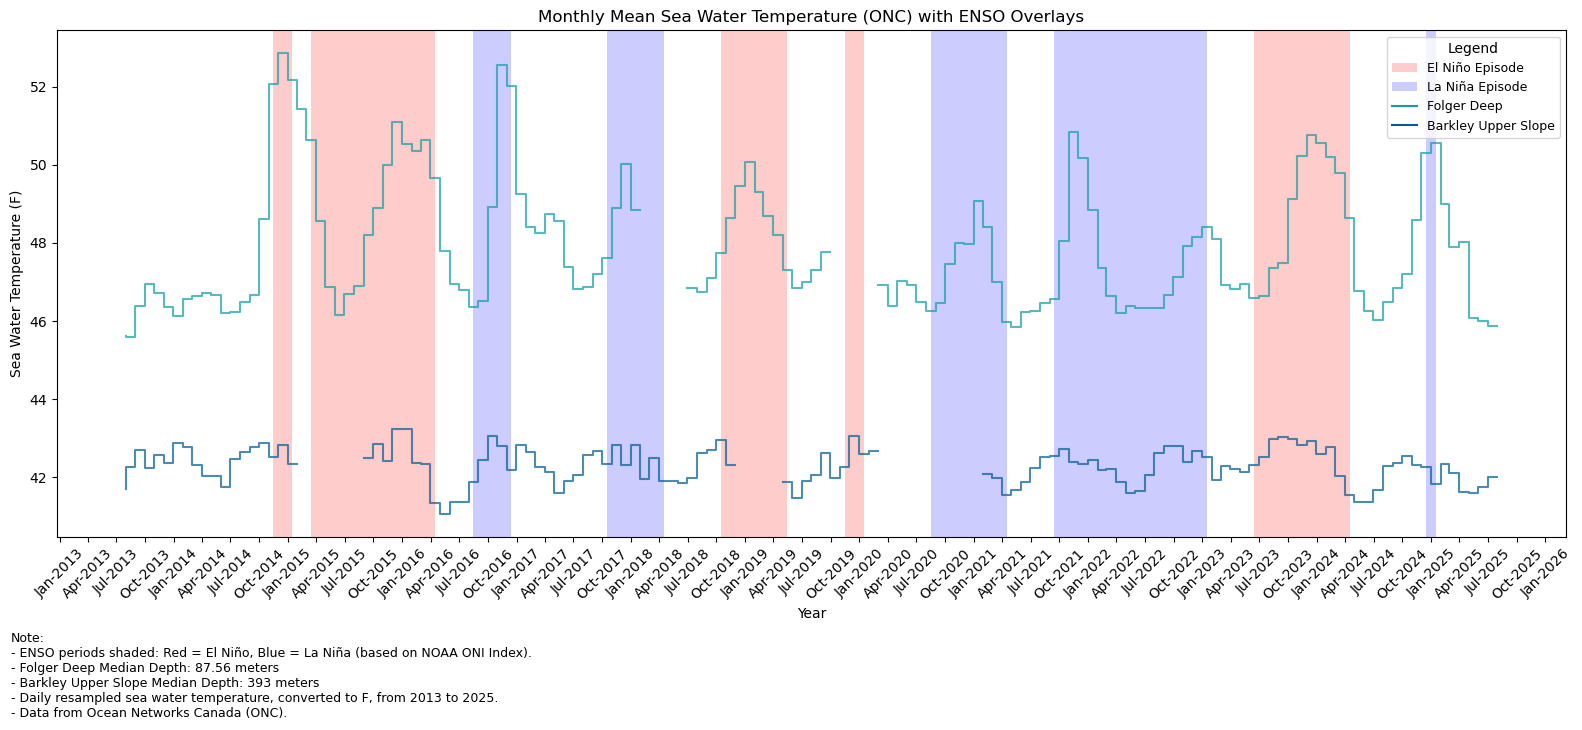

In [11]:
# Initialize Plots
fig, ax = plt.subplots(figsize = (16,6))

# ENSO Overlay
grp = (oni.PHASE != oni.PHASE.shift()).cumsum()
for _, g in oni.groupby(grp):
    phase = g.PHASE.iloc[0]
    if phase == 'El Niño':
        ax.axvspan(g.index[0], g.index[-1], color = 'red', alpha = 0.2, lw = 0)
    elif phase == 'La Niña':
        ax.axvspan(g.index[0], g.index[-1], color = 'blue', alpha = 0.2, lw = 0)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))

ax.set_xlabel("Year")
ax.set_ylabel("Temperature (F)")


plt.step(folger_df_resample.index, folger_df_resample.values, color = "#119DA4", alpha = 0.7)
plt.step(barkley_df_resample["Datetime"], barkley_df_resample["Temp_F"], color = "#015C92", alpha = 0.7)

plt.xlabel("Year")
plt.ylabel("Sea Water Temperature (F)")
plt.title(f"{resampleString} Mean Sea Water Temperature (ONC) with ENSO Overlays")

# Label Legend
enso_patches = [
    Patch(facecolor = "red", alpha = 0.2, label = "El Niño Episode"),
    Patch(facecolor = "blue", alpha = 0.2, label = "La Niña Episode")
]
handles = enso_patches + [
    mlines.Line2D([], [], color = "#119DA4", lw = 1.5, label = "Folger Deep"),
    mlines.Line2D([], [], color = "#015C92", lw = 1.5, label = "Barkley Upper Slope")
]
ax.legend(
    handles = handles,
    loc = "upper right",
    frameon = True,
    title = "Legend",
    fontsize = 9
)

# MetaData
metadata = (
    "Note:\n"
    "- ENSO periods shaded: Red = El Niño, Blue = La Niña (based on NOAA ONI Index).\n"
    f"- Folger Deep Median Depth: {median_depth:.2f} meters\n"
    "- Barkley Upper Slope Median Depth: 393 meters\n"
    "- Daily resampled sea water temperature, converted to F, from 2013 to 2025.\n"
    "- Data from Ocean Networks Canada (ONC)."
)
plt.figtext(0.01, -0.2, metadata, ha = "left", fontsize = 9, wrap = True)

plt.tight_layout()
plt.xticks(rotation = 45)
plt.savefig(f"/home/jovyan/ONC_Temperature/images/{resampleString}_water_temp_ONC.png", dpi = 300)
plt.show()


### Analysis

The visualizations in this notebook provide an overview of the sea water temperature trends at the selected ONC device and their relationship ENSO events. There were no clear relationship with the site's sea water temperature data with the ENSO events.

### Citation
The following is for citing Ocean Networks Canada.

In [ ]:
from datetime import datetime

# Metadata dictionary from your file
md = {
    'creator_name': 'Ocean Networks Canada',
    'title': 'Ocean Networks Canada Time Series Scalar Data',
    'institution': 'Ocean Networks Canada',
    'date_created': '20250710T084359Z',
}

# 1) Extract the pieces
author = md['creator_name']
title = md['title']
publisher = md.get('publisher_name') or md.get('institution')
year = datetime.strptime(md['date_created'], '%Y%m%dT%H%M%SZ').year

# 2) Actual DOI from the NetCDF metadata
doi = '10.34943/616a1ee9-9cac-4871-83df-d300bfa260be'

# 3) Persistent identifier (the page where you downloaded the file)
persistent_id = 'https://data.oceannetworks.ca/DataSearch?locationCode=NCBC&deviceCategoryCode=CTD'

# 4) Build & print
citation = (
    f"{author} ({year}). {title}. {publisher}. "
    f"https://doi.org/{doi}. "
    f"Local query persistent identifier: {persistent_id}"
)

print(citation)
